# Stock Price Prediction Using Long-Short Term Memory Neural Network

In [645]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))




In [875]:
Amazon=yf.download('AMZN',period='max')


[*********************100%***********************]  1 of 1 completed


In [876]:
AMZN=pd.DataFrame(Amazon)
print('------------------------------------------------------------------------')
display(AMZN)
print('------------------------------------------------------------------------')

------------------------------------------------------------------------


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2022-07-18,115.000000,117.239998,113.150002,113.760002,113.760002,59115400
2022-07-19,115.699997,118.949997,114.029999,118.209999,118.209999,60990000
2022-07-20,118.620003,123.480003,118.320000,122.769997,122.769997,71268300


------------------------------------------------------------------------


## From above dataframe, we have 6338 data points collected on daily basis.

In [877]:
print("-----------------------------------------")
print('First Data Point from:',AMZN.index[0])
print("-----------------------------------------")
print('Second Data Point from:',AMZN.index[-1])
print("-----------------------------------------")


-----------------------------------------
First Data Point from: 1997-05-15 00:00:00
-----------------------------------------
Second Data Point from: 2022-07-22 00:00:00
-----------------------------------------


## Copying Amazon DataFrame to New Variable for Analysis

In [878]:
df=AMZN.copy()
print('------------------------------------------------------------------------')
display(df.head())
print('------------------------------------------------------------------------')
display(df.tail())
print('------------------------------------------------------------------------')



------------------------------------------------------------------------


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


------------------------------------------------------------------------


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-18,115.000000,117.239998,113.150002,113.760002,113.760002,59115400
2022-07-19,115.699997,118.949997,114.029999,118.209999,118.209999,60990000
2022-07-20,118.620003,123.480003,118.320000,122.769997,122.769997,71268300
2022-07-21,123.199997,124.849998,121.260002,124.629997,124.629997,60239900
2022-07-22,125.010002,125.500000,121.349998,122.419998,122.419998,51402700


------------------------------------------------------------------------


## Some Statistical Summary

In [529]:
print('------------------------------------------------------------------------')
display(df.describe())
print('------------------------------------------------------------------------')

------------------------------------------------------------------------


,Open,High,Low,Close,Adj Close,Volume
count,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6.338000e+03
mean,29.498834,29.842146,29.120330,29.488465,29.488465,1.446027e+08
std,46.973638,47.504267,46.376083,46.939058,46.939058,1.414882e+08
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06
25%,1.964625,2.000000,1.936000,1.968563,1.968563,7.025600e+07
50%,5.935250,6.030250,5.852500,5.942750,5.942750,1.076640e+08
75%,33.299999,33.774501,32.986624,33.270000,33.270000,1.632700e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09


------------------------------------------------------------------------


## Missing Values

In [724]:
#checking for missing values
print('------------------------------------------------------------------------')
display(df.isnull().sum())
print('------------------------------------------------------------------------')


------------------------------------------------------------------------


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

------------------------------------------------------------------------


## Plot of Each Category - Open, High, Low, Close, Adj. Close, Volume with Time(Daily)

-------------------------------------------------------------------------------------------------------------------------------


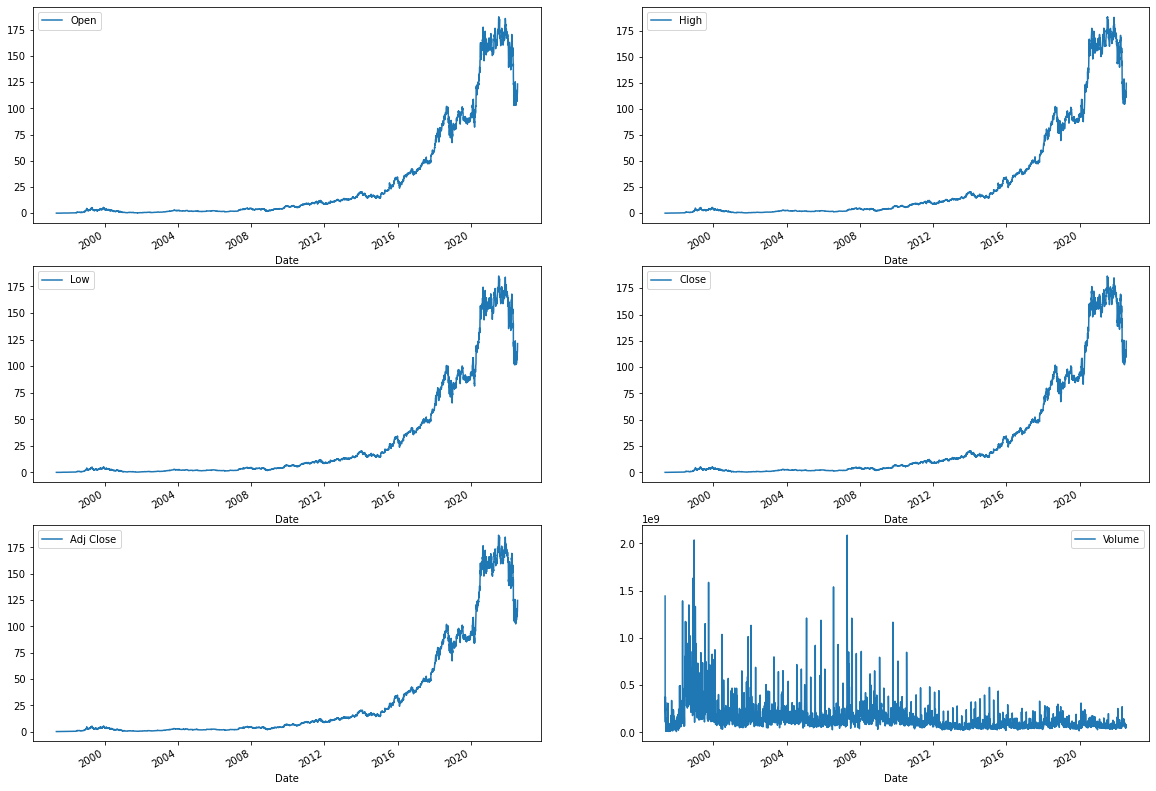

In [538]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)
c=0
print('-------------------------------------------------------------------------------------------------------------------------------')
for i in range(3):
    df.plot(y=df.columns[c],ax=axes[i][0])
    df.plot(y=df.columns[c+1],ax=axes[i][1])
    c=c+2







## Pair Plot between Each Features

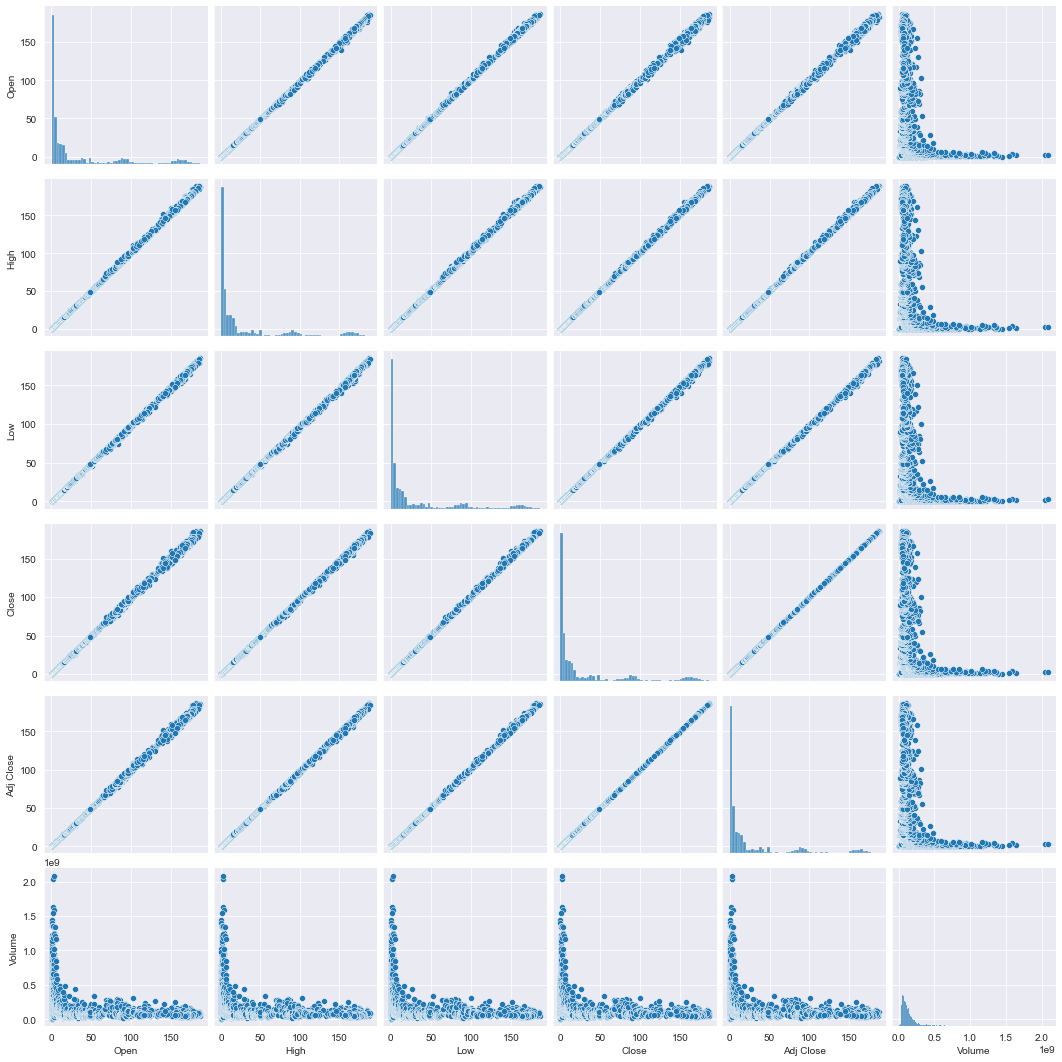

In [381]:
sns.pairplot(df)

## Function for Generating Plots between any Features of the Data Frame

-------------------------------------------------------------------------------------------------------------------------------


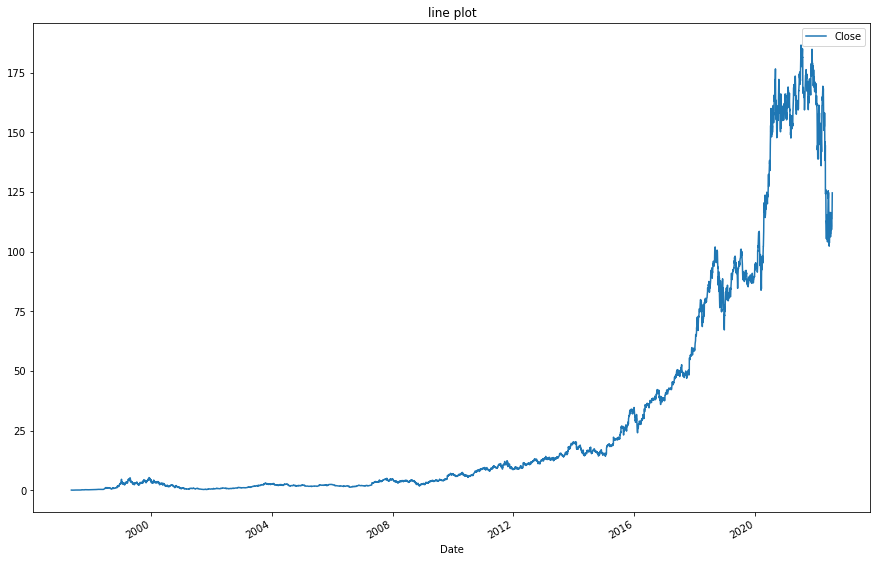

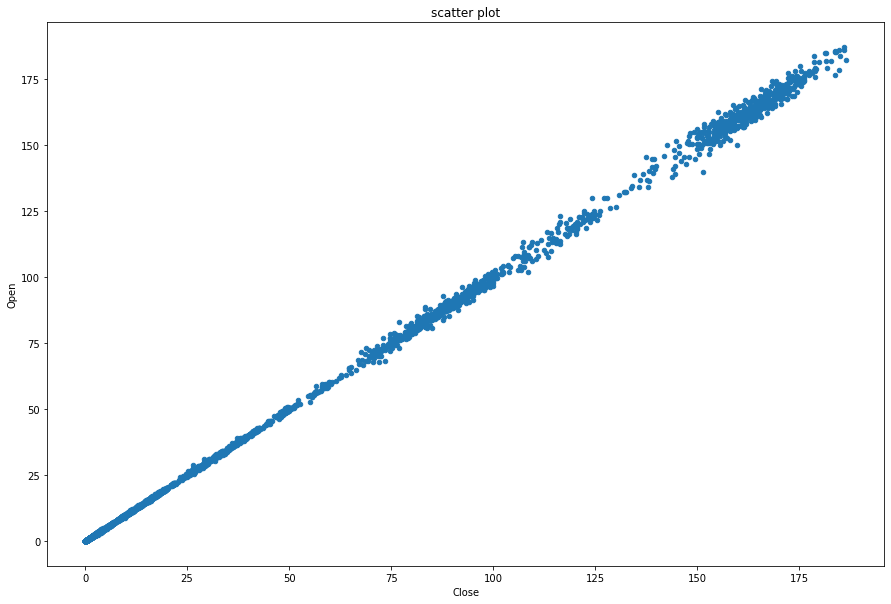

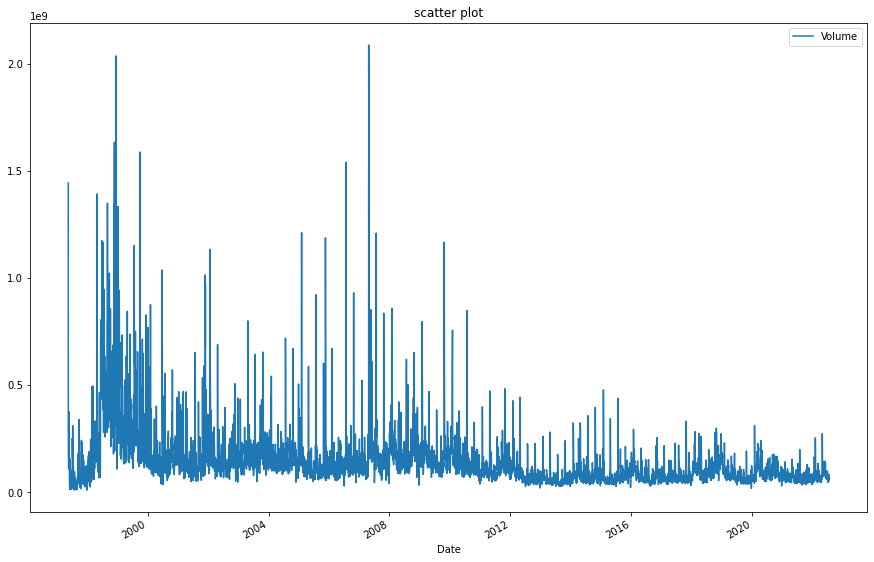

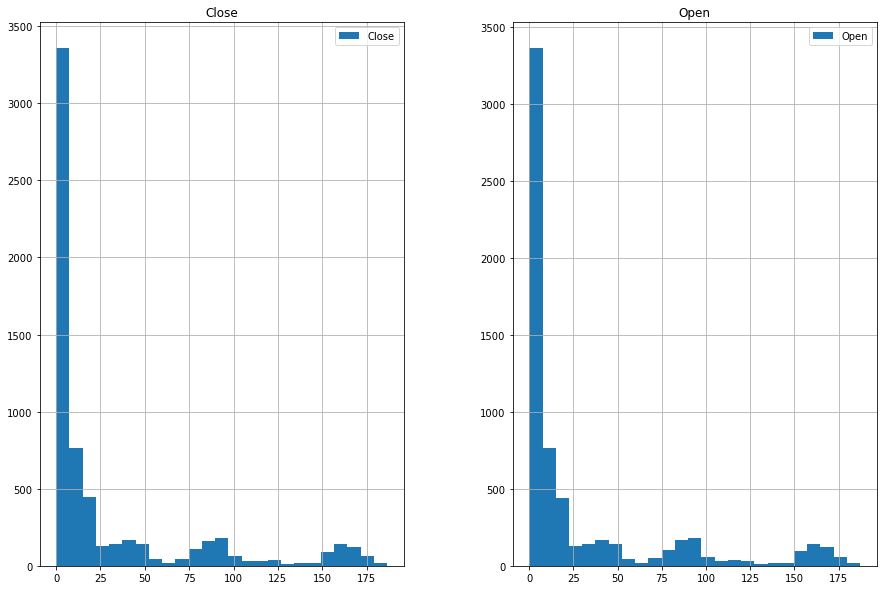

In [568]:
def plot_df(x,y,kind):   #kind = scatter, line, hist , (hist will generate 2 plot)
    if x=='Date':
        df.plot(y=y,figsize=(15,10),title=kind + ' plot')
    elif kind=='hist':
        df.hist(column=[x,y],bins=25,figsize=(15,10),legend=True)
    else:
        df.plot(x=x, y=y,kind=kind,figsize=(15,10), title=kind + ' plot')

print('-------------------------------------------------------------------------------------------------------------------------------')

plot_df('Date','Close','line')
plot_df('Close','Open','scatter')
plot_df('Date','Volume','scatter')
plot_df('Close','Open','hist')






## Plot of Each Category - Open, High, Low, Close, Adj. Close, Volume with Time(Monthly)

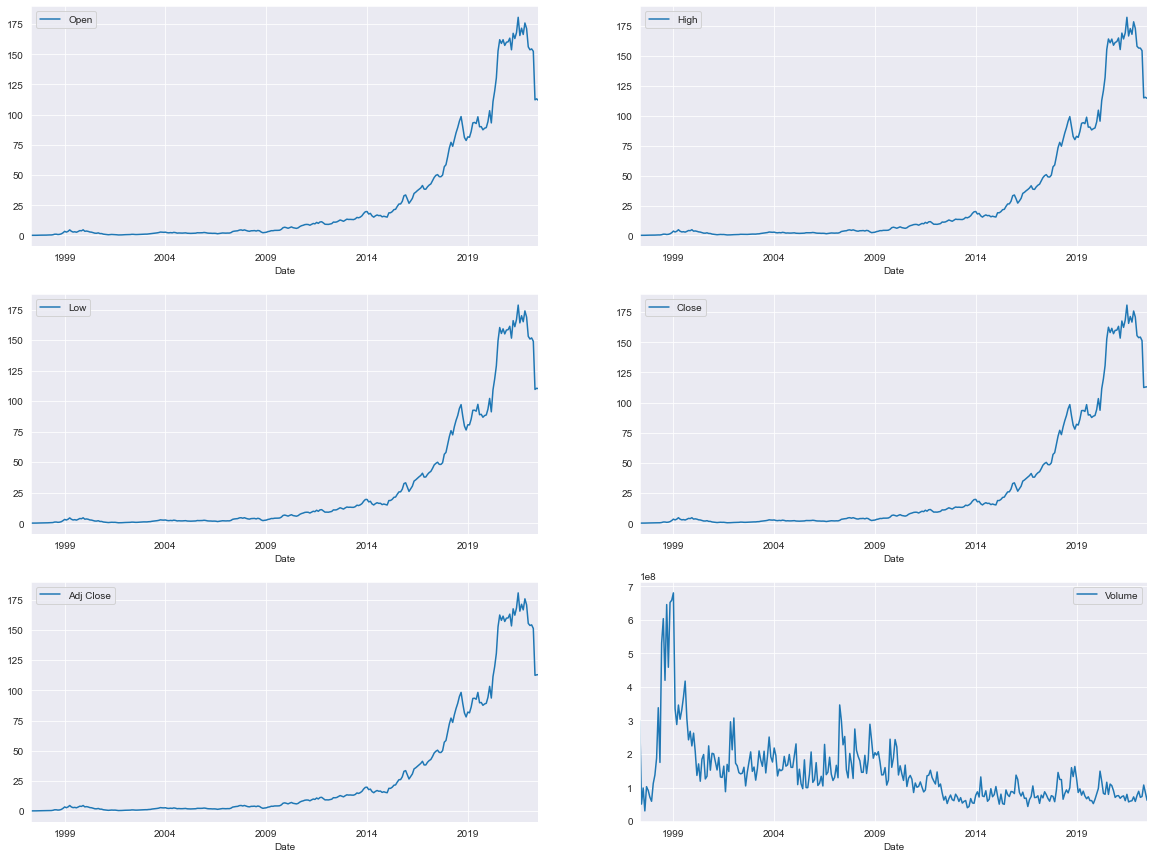

In [404]:
#month wise average Open. High, Low,...
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)
c=0
for i in range(3):
    df.resample(rule='BM').mean().plot(y=df.columns[c],ax=axes[i][0])
    df.resample(rule='BM').mean().plot(y=df.columns[c+1],ax=axes[i][1])
    c=c+2



## Plot of Each Category - Open, High, Low, Close, Adj. Close, Volume with Time(Yealy)

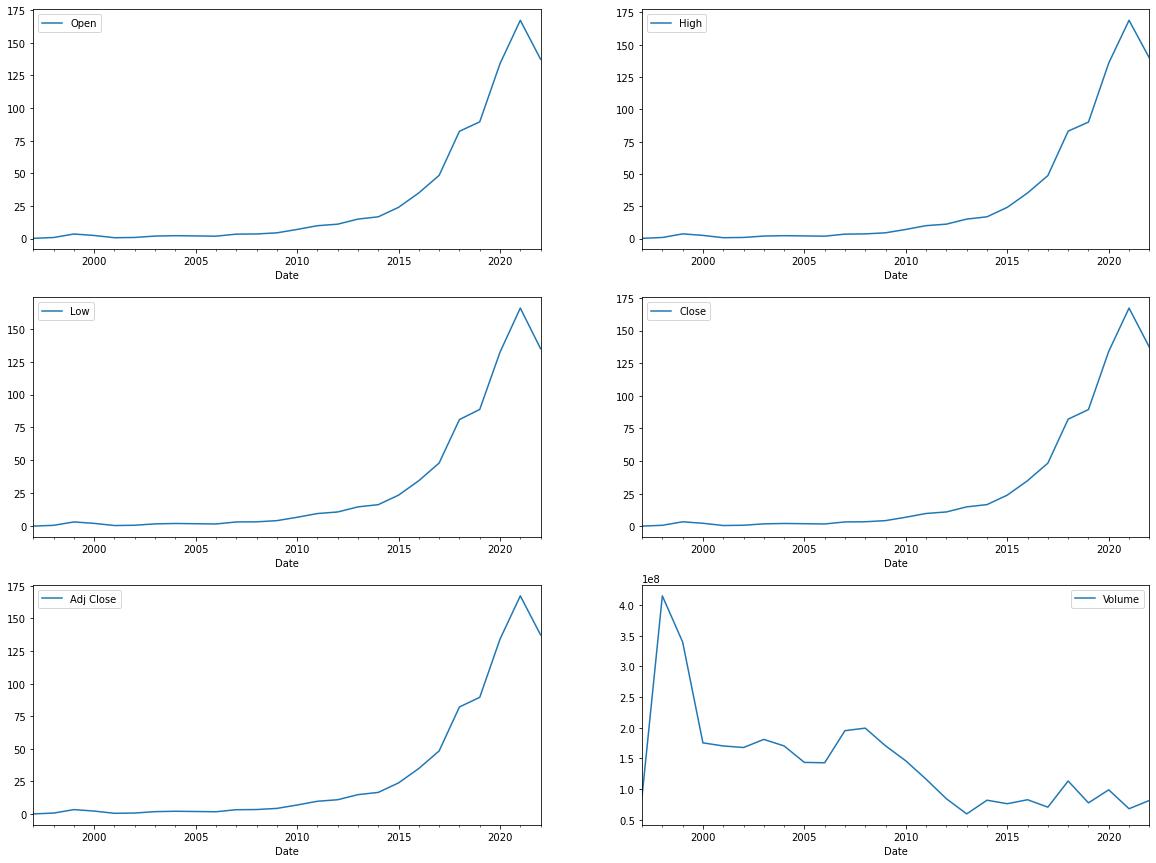

In [8]:
#year wise average data
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)
c=0
for i in range(3):
    df.resample(rule='BY').mean().plot(y=df.columns[c],ax=axes[i][0])
    df.resample(rule='BY').mean().plot(y=df.columns[c+1],ax=axes[i][1])
    c=c+2



## We can clearly observe that there is rise in the market from some where between 2004 and 2009 (~2006 most probably).

-------------------------------------------------------------------------------------------------------------------------------


<AxesSubplot:xlabel='Date'>

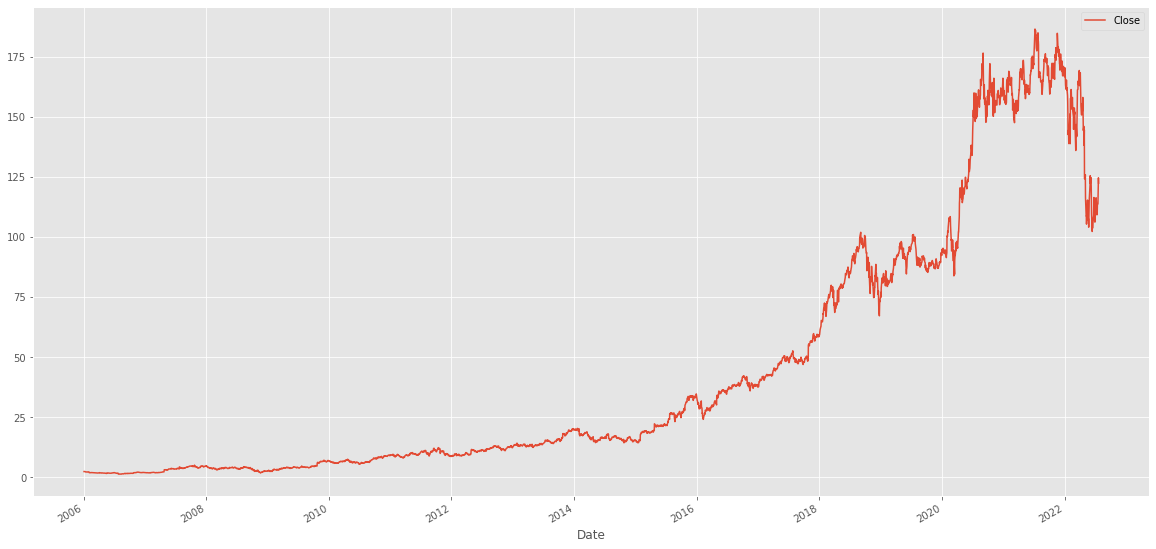

In [879]:
df1=df.loc['2006-01-01':]
print('-------------------------------------------------------------------------------------------------------------------------------')
df1.plot(y='Close',figsize=(20,10))


## Plot for Close Category along with Moving Average of 50, 100 and 200.

-------------------------------------------------------------------------------------------------------------------------------


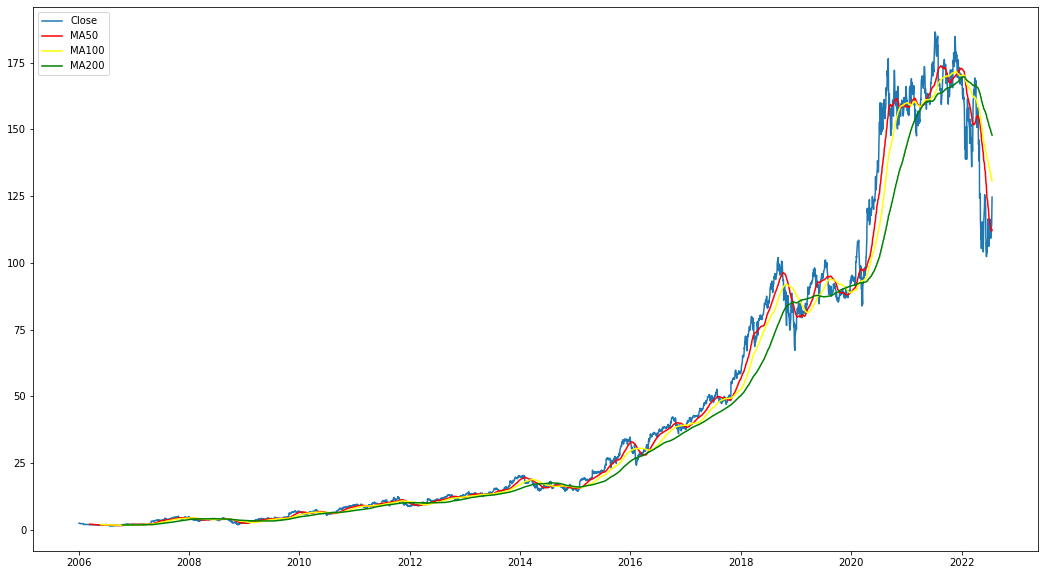

In [571]:
#moving averages for Close with window length 50,100 and 200
ma50=df1.Close.rolling(50).mean()
ma100=df1.Close.rolling(100).mean()
ma200=df1.Close.rolling(200).mean()

print('-------------------------------------------------------------------------------------------------------------------------------')

plt.figure(figsize=(18,10))
plt.plot(df1.Close)
plt.plot(ma50, color='red')
plt.plot(ma100, color='yellow')
plt.plot(ma200, color='green')
plt.legend(['Close','MA50','MA100','MA200'])




# Data Pre Processing and Model for Predicting Closing Price

## Data Preparation

### Feature Selection : We will be using 100 previous closing prices to predict the current one.

In [880]:
#creating a dataframe with pass 100 Closing price(Close 1 to Close 100) along with the target closing price('Close')
data=pd.DataFrame(df1.Close)
for i in range(1,101):
    string='Close {}'
    data[string.format(i)]= data['Close'].shift(+(101-i))
print('-------------------------------------------------------------------------------------------------------------------------------')
display(data)
print('-------------------------------------------------------------------------------------------------------------------------------')


-------------------------------------------------------------------------------------------------------------------------------


C:\Users\rvask\AppData\Local\Temp\ipykernel_23300\214936272.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[string.format(i)]= data['Close'].shift(+(101-i))


,Close,Close 1,Close 2,Close 3,Close 4,Close 5,Close 6,Close 7,Close 8,Close 9,...,Close 91,Close 92,Close 93,Close 94,Close 95,Close 96,Close 97,Close 98,Close 99,Close 100
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,2.379000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,2.362500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379000
2006-01-05,2.382500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379000,2.362500
2006-01-06,2.393500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379000,2.362500,2.382500
2006-01-09,2.354000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.379000,2.362500,2.382500,2.393500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18,113.760002,150.197495,144.826996,151.358002,153.788498,153.563004,151.141998,152.052505,147.898499,145.641006,...,109.559998,113.500000,114.330002,116.330002,115.540001,111.750000,109.220001,110.400002,110.629997,113.550003
2022-07-19,118.209999,144.826996,151.358002,153.788498,153.563004,151.141998,152.052505,147.898499,145.641006,137.453003,...,113.500000,114.330002,116.330002,115.540001,111.750000,109.220001,110.400002,110.629997,113.550003,113.760002
2022-07-20,122.769997,151.358002,153.788498,153.563004,151.141998,152.052505,147.898499,145.641006,137.453003,136.014496,...,114.330002,116.330002,115.540001,111.750000,109.220001,110.400002,110.629997,113.550003,113.760002,118.209999


-------------------------------------------------------------------------------------------------------------------------------


## We can observe the presence of NaN values, hence we will drop all those rows.

In [881]:
data.dropna(axis=0,inplace=True)
colm=data.columns
print('-------------------------------------------------------------------------------------------------------------------------------')
display(data)
print('-------------------------------------------------------------------------------------------------------------------------------')


-------------------------------------------------------------------------------------------------------------------------------


,Close,Close 1,Close 2,Close 3,Close 4,Close 5,Close 6,Close 7,Close 8,Close 9,...,Close 91,Close 92,Close 93,Close 94,Close 95,Close 96,Close 97,Close 98,Close 99,Close 100
Date,,,,,,,,,,,,,,,,,,,,,
2006-05-26,1.803500,2.379000,2.362500,2.382500,2.393500,2.354000,2.282500,2.246500,2.218000,2.220000,...,1.636500,1.639000,1.638000,1.580500,1.630500,1.697000,1.741500,1.688000,1.759500,1.781500
2006-05-30,1.732000,2.362500,2.382500,2.393500,2.354000,2.282500,2.246500,2.218000,2.220000,2.200000,...,1.639000,1.638000,1.580500,1.630500,1.697000,1.741500,1.688000,1.759500,1.781500,1.803500
2006-05-31,1.730500,2.382500,2.393500,2.354000,2.282500,2.246500,2.218000,2.220000,2.200000,2.216000,...,1.638000,1.580500,1.630500,1.697000,1.741500,1.688000,1.759500,1.781500,1.803500,1.732000
2006-06-01,1.753500,2.393500,2.354000,2.282500,2.246500,2.218000,2.220000,2.200000,2.216000,2.222500,...,1.580500,1.630500,1.697000,1.741500,1.688000,1.759500,1.781500,1.803500,1.732000,1.730500
2006-06-02,1.738000,2.354000,2.282500,2.246500,2.218000,2.220000,2.200000,2.216000,2.222500,2.196000,...,1.630500,1.697000,1.741500,1.688000,1.759500,1.781500,1.803500,1.732000,1.730500,1.753500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18,113.760002,150.197495,144.826996,151.358002,153.788498,153.563004,151.141998,152.052505,147.898499,145.641006,...,109.559998,113.500000,114.330002,116.330002,115.540001,111.750000,109.220001,110.400002,110.629997,113.550003
2022-07-19,118.209999,144.826996,151.358002,153.788498,153.563004,151.141998,152.052505,147.898499,145.641006,137.453003,...,113.500000,114.330002,116.330002,115.540001,111.750000,109.220001,110.400002,110.629997,113.550003,113.760002
2022-07-20,122.769997,151.358002,153.788498,153.563004,151.141998,152.052505,147.898499,145.641006,137.453003,136.014496,...,114.330002,116.330002,115.540001,111.750000,109.220001,110.400002,110.629997,113.550003,113.760002,118.209999


-------------------------------------------------------------------------------------------------------------------------------


## Linear Models

### Train-Test Split

In [882]:
train=data.loc['2006-05-25':'2016-12-30']
test=data.loc['2017-01-03':]


### Feature Scaling

In [883]:
#training data
#-----------------------------------------------------------------------------------------------------------------------
train=pd.DataFrame(scaler.fit_transform(train),columns=train.columns,index=train.index)
y_train=train.Close.values
train.drop('Close',axis=1,inplace=True)
X_train=train.values

#testing data
#-----------------------------------------------------------------------------------------------------------------------
y_test=pd.DataFrame(test.Close)
test.drop('Close',axis=1,inplace=True)
test=pd.DataFrame(scaler.fit_transform(test),columns=test.columns,index=test.index)
X_test=test.values



C:\Users\rvask\AppData\Local\Temp\ipykernel_23300\487155531.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Close',axis=1,inplace=True)


### Fitting the Model

In [884]:
Lr,Rd=LinearRegression(),Ridge()
Lr,Rd=Lr.fit(X_train,y_train), Rd.fit(X_train,y_train)
print('-------------------------------------------------------------------------------')
y_testt=scaler.fit_transform(y_test)
print("R^2 for Linear Regression----",Lr.score(X_test,y_testt))
print('-------------------------------------------------------------------------------')
print("R^2 for Ridge Regression----",Rd.score(X_test,y_testt))
print('-------------------------------------------------------------------------------')





-------------------------------------------------------------------------------
R^2 for Linear Regression---- 0.9965832322990414
-------------------------------------------------------------------------------
R^2 for Ridge Regression---- 0.9936195495773313
-------------------------------------------------------------------------------


### Model Results

In [885]:
X_train.shape

(2669, 100)

In [886]:
data.shape[0]-y_test.shape[0]

2669

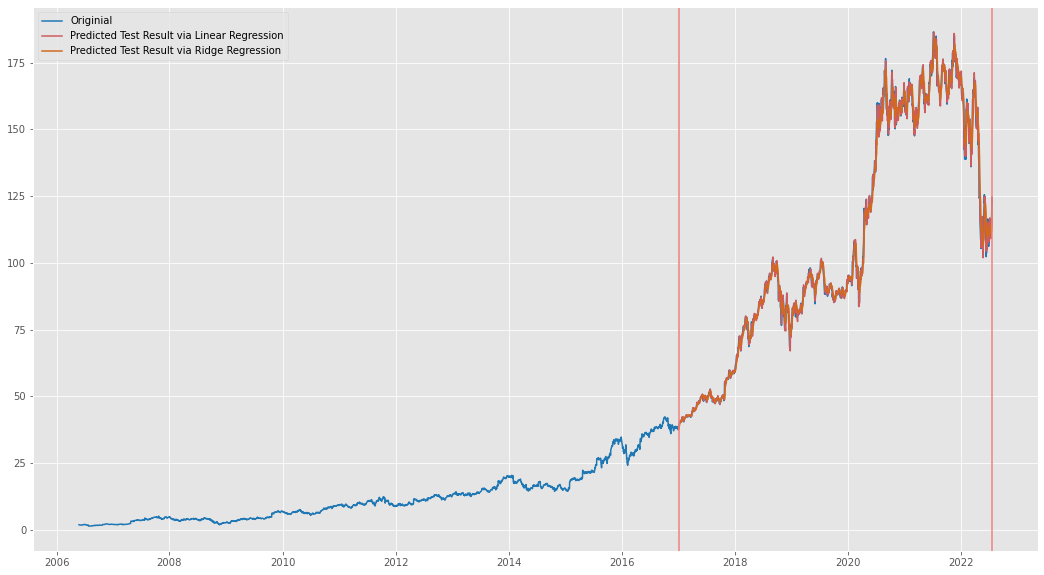

In [887]:
y_lr=Lr.predict(X_test)
y_rd=Rd.predict(X_test)
y_lr=scaler.inverse_transform([y_lr])
y_rd=scaler.inverse_transform([y_rd])
plt.figure(figsize=(18,10))
plt.plot(data.Close,'tab:blue')
plt.plot(data.index[data.shape[0]-y_test.shape[0]:],y_lr[0],'indianred')
plt.plot(data.index[data.shape[0]-y_test.shape[0]:],y_rd[0],'chocolate')
plt.axvline(x=data.index[data.shape[0]-y_test.shape[0]],color='lightcoral')
plt.axvline(x=data.index[-1],color='lightcoral')
plt.legend(['Originial','Predicted Test Result via Linear Regression','Predicted Test Result via Ridge Regression'])





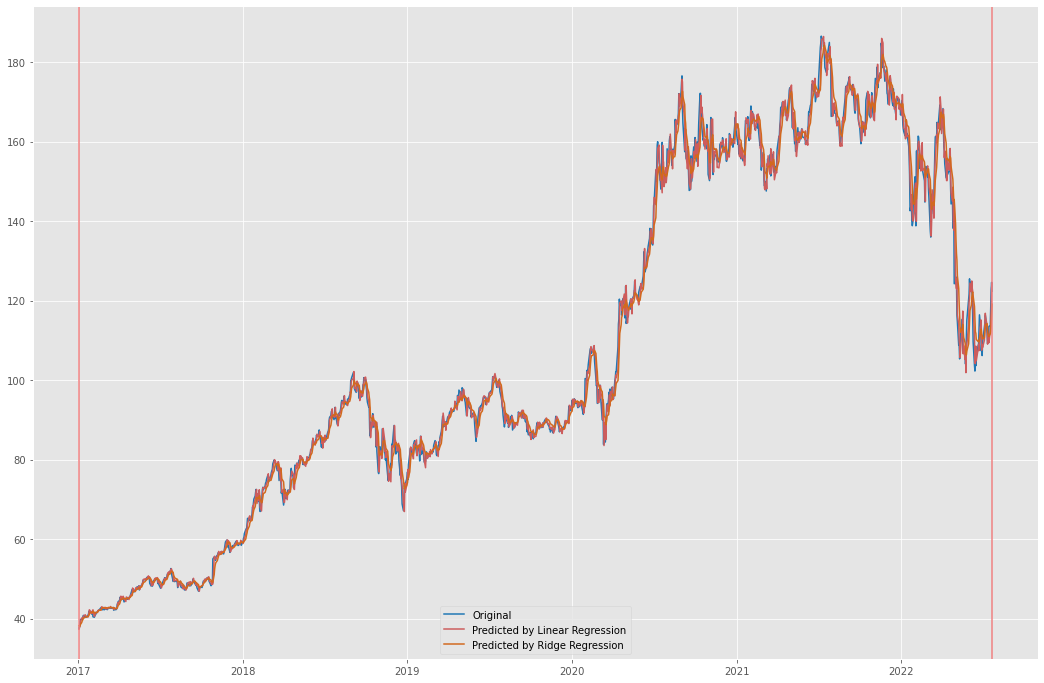

In [888]:
plt.figure(figsize=(18,12))
plt.plot(data.index[2669:],y_test.values,'tab:blue')
plt.plot(data.index[2669:],y_lr[0],'indianred')
plt.plot(data.index[2669:],y_rd[0],'chocolate')
plt.axvline(x=data.index[2669],color='lightcoral')
plt.axvline(x=data.index[-1],color='lightcoral')
plt.legend(['Original','Predicted by Linear Regression','Predicted by Ridge Regression'])

## LSTM Model

### Train-Val-Test Split

In [798]:
train=data.loc['2006-05-25':'2016-12-30']
val=data.loc['2017-01-03':'2020-01-03']
test=data.loc['2020-01-04':]


### Feature Scaling

In [799]:
#training data
#-----------------------------------------------------------------------------------------------------------------------
train=pd.DataFrame(scaler.fit_transform(train),columns=train.columns,index=train.index)
y_train=train.Close.values
train.drop('Close',axis=1,inplace=True)
X_train=train.values

#validation data
#-----------------------------------------------------------------------------------------------------------------------
val=pd.DataFrame(scaler.fit_transform(val),columns=val.columns,index=val.index)
y_val=val.Close.values
val.drop('Close',axis=1,inplace=True)
X_val=val.values

#testing data
#-----------------------------------------------------------------------------------------------------------------------
y_test=pd.DataFrame(test.Close)
test.drop('Close',axis=1,inplace=True)
test=pd.DataFrame(scaler.fit_transform(test),columns=test.columns,index=test.index)
X_test=test.values



C:\Users\rvask\AppData\Local\Temp\ipykernel_23300\4116476405.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Close',axis=1,inplace=True)


In [747]:
X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape


((2669, 100), (756, 100), (641, 100), (2669,), (756,))

### Fitting the Model

In [748]:
model=Sequential()
model.add(LSTM(200,activation='tanh',return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.1))
model.add(LSTM(200,activation='tanh',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(250,activation='tanh',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(250,activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.0001),loss='mean_squared_error',metrics='mean_squared_error')
model.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_159 (LSTM)             (None, 100, 200)          161600    
                                                                 
 dropout_157 (Dropout)       (None, 100, 200)          0         
                                                                 
 lstm_160 (LSTM)             (None, 100, 200)          320800    
                                                                 
 dropout_158 (Dropout)       (None, 100, 200)          0         
                                                                 
 lstm_161 (LSTM)             (None, 100, 250)          451000    
                                                                 
 dropout_159 (Dropout)       (None, 100, 250)          0         
                                                                 
 lstm_162 (LSTM)             (None, 250)             

In [749]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=200)

Epoch 1/200
84/84 [==============================] - 12s 73ms/step - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 2/200
84/84 [==============================] - 4s 48ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 3/200
84/84 [==============================] - 4s 47ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 4/200
84/84 [==============================] - 4s 44ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 5/200
84/84 [==============================] - 4s 49ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 6/200
84/84 [==============================] - 4s 46ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 7/200
84/84 [========

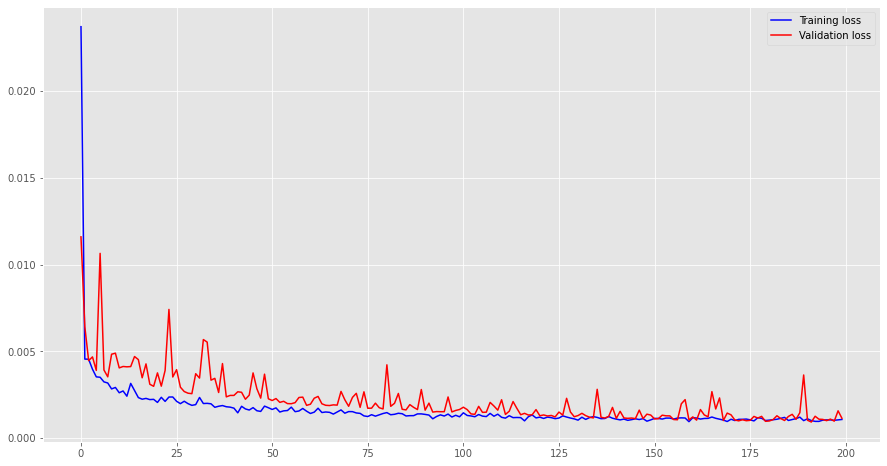

In [750]:
plt.figure(figsize=(15,8))
plt.style.use("ggplot")
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.legend()


### Model Results

In [800]:
y_pred=model.predict(X_test)
print('-------------------------------------------------------------------------------')
y_testt=scaler.fit_transform(y_test)
print("R^2 for LSTM Model----",r2_score(y_pred,y_testt))
print('-------------------------------------------------------------------------------')

21/21 [==============================] - 1s 35ms/step
-------------------------------------------------------------------------------
R^2 for LSTM Model---- 0.9570879458791254
-------------------------------------------------------------------------------


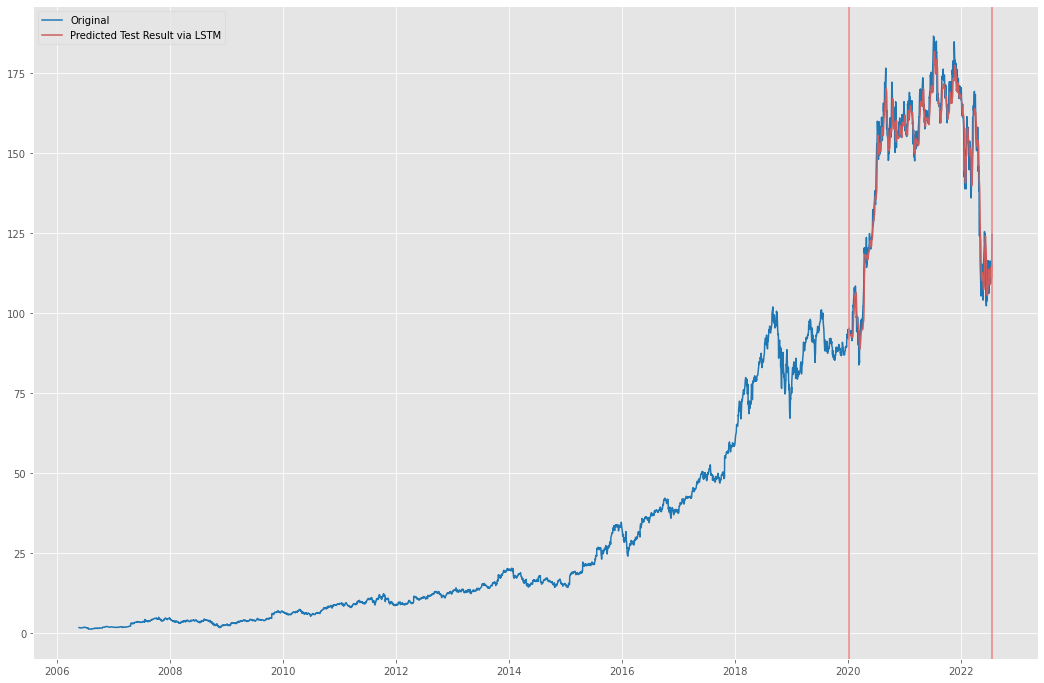

In [801]:
y_lstm=scaler.inverse_transform(y_pred)
plt.figure(figsize=(18,12))
plt.plot(data.Close,'tab:blue')
plt.plot(data.index[3425:],y_lstm,'indianred')
plt.axvline(x=data.index[3425],color='lightcoral')
plt.axvline(x=data.index[-1],color='lightcoral')
plt.legend(['Original','Predicted Test Result via LSTM'])


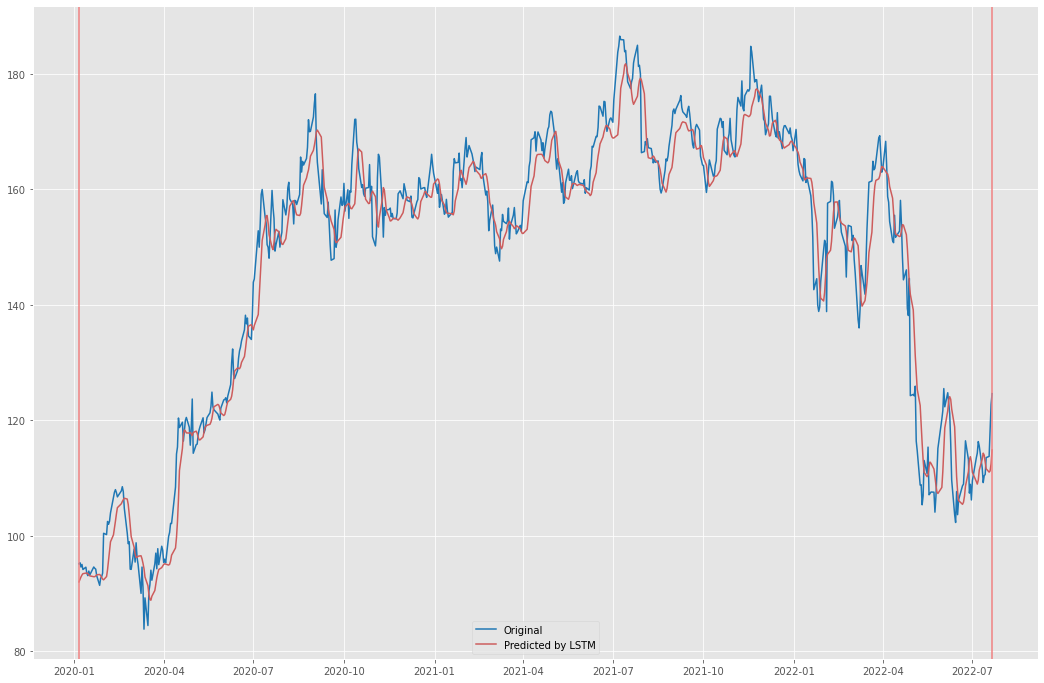

In [802]:
plt.figure(figsize=(18,12))
plt.plot(data.index[3425:],y_test.values,'tab:blue')
plt.plot(data.index[3425:],y_lstm,'indianred')
plt.axvline(x=data.index[3425],color='lightcoral')
plt.axvline(x=data.index[-1],color='lightcoral')
plt.legend(['Original','Predicted by LSTM'])

### Saving the Model

In [761]:
model.save("LSTM.h5")  #keras.h5 format 


### Predicting Beyond - Tried predicting the results beyond availble data by using prediction result at last test point and then by using it along with previous 99 target values to predict next and so on...

In [762]:
y_stock=[]
p1=[]
p=X_test[640:641].tolist()
y_pred1=model.predict([p]).tolist()
for i in range(641):
    p=p.copy()
    p[0].pop(0)
    p[0].insert(99,y_pred1[0][0])
    p1.append(p)
    y_pred1=model.predict([p]).tolist()
    y_stock.append(y_pred1[0][0])
y_new=np.append(y_pred,y_stock)

    


1/1 [==============================] - 0s 29ms/step


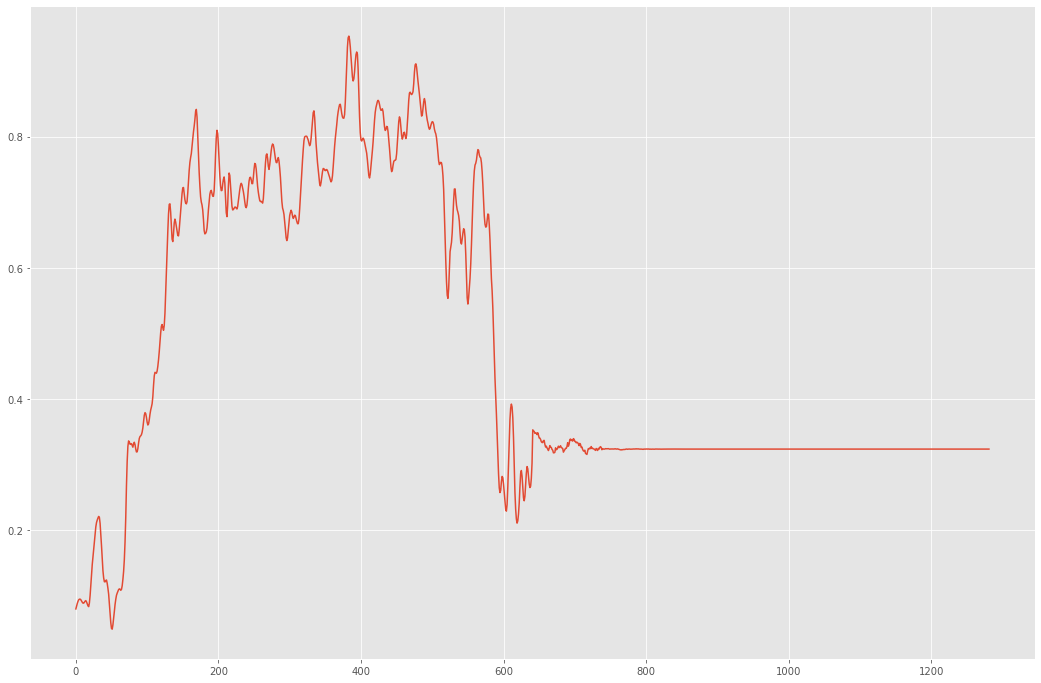

In [764]:
plt.figure(figsize=(18,12))
plt.plot(y_new)

### We can see that model is not doing great beyond, by using its own predicted value. 
### _Please don't try to implement this for investing in the stock market._

## ~ KripaNath (kripaa.nath@gmail.com)